In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
main_table <- read_csv("data/processed.cleveland.data")
x <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
colnames(main_table) <- x
main_table <- main_table |>
              mutate(num = as_factor(num)) |>
              mutate(num = fct_recode(num, "negative" = "0" , "positive" = "1", "positive" = "2", "positive" = "3", "positive" = "4"))
main_table <- main_table |>
              select(age, trestbps, chol, num)
main_table

New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,trestbps,chol,num
<dbl>,<dbl>,<dbl>,<fct>
67,160,286,positive
67,120,229,positive
37,130,250,negative
⋮,⋮,⋮,⋮
57,130,131,positive
57,130,236,positive
38,138,175,negative


In [3]:
heart_split <- initial_split(main_table, prop = 0.75, strata = num)  
heart_training <- training(heart_split)   
heart_test  <- testing(heart_split)

rows <- heart_training |> 
        group_by(num) |>
        summarize(sample = n())
rows

mean <- heart_training |> 
        group_by(num) |>
        summarize(average_age = mean(age), average_trestbps = mean(trestbps), average_chol = mean(chol))
mean

max <- heart_training |> 
        group_by(num) |>
        summarize(max_age = max(age), max_trestbps = max(trestbps), max_chol = max(chol))

max

min <- heart_training |> 
        group_by(num) |>
        summarize(min_age = min(age), min_trestbps = min(trestbps), min_chol = min(chol))

min

num,sample
<fct>,<int>
negative,122
positive,104


num,average_age,average_trestbps,average_chol
<fct>,<dbl>,<dbl>,<dbl>
negative,51.45902,127.7213,240.2295
positive,56.56731,133.6731,253.7212


num,max_age,max_trestbps,max_chol
<fct>,<dbl>,<dbl>,<dbl>
negative,76,178,564
positive,77,200,409


num,min_age,min_trestbps,min_chol
<fct>,<dbl>,<dbl>,<dbl>
negative,29,94,126
positive,35,100,131


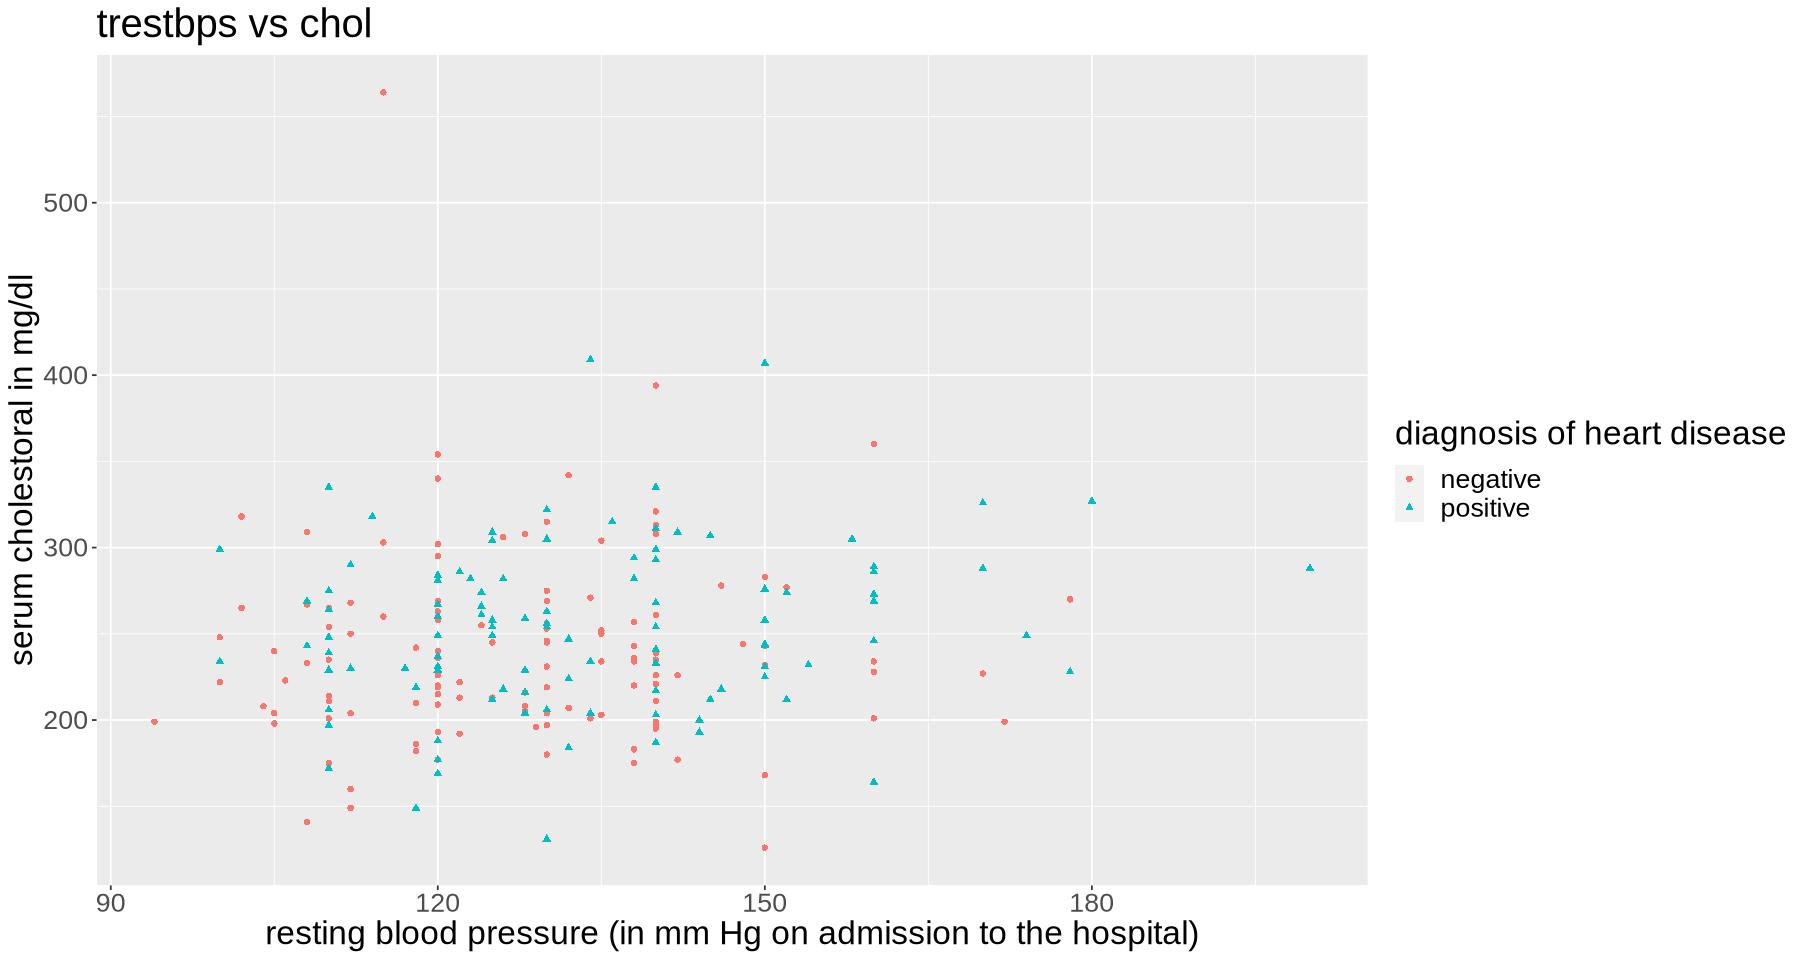

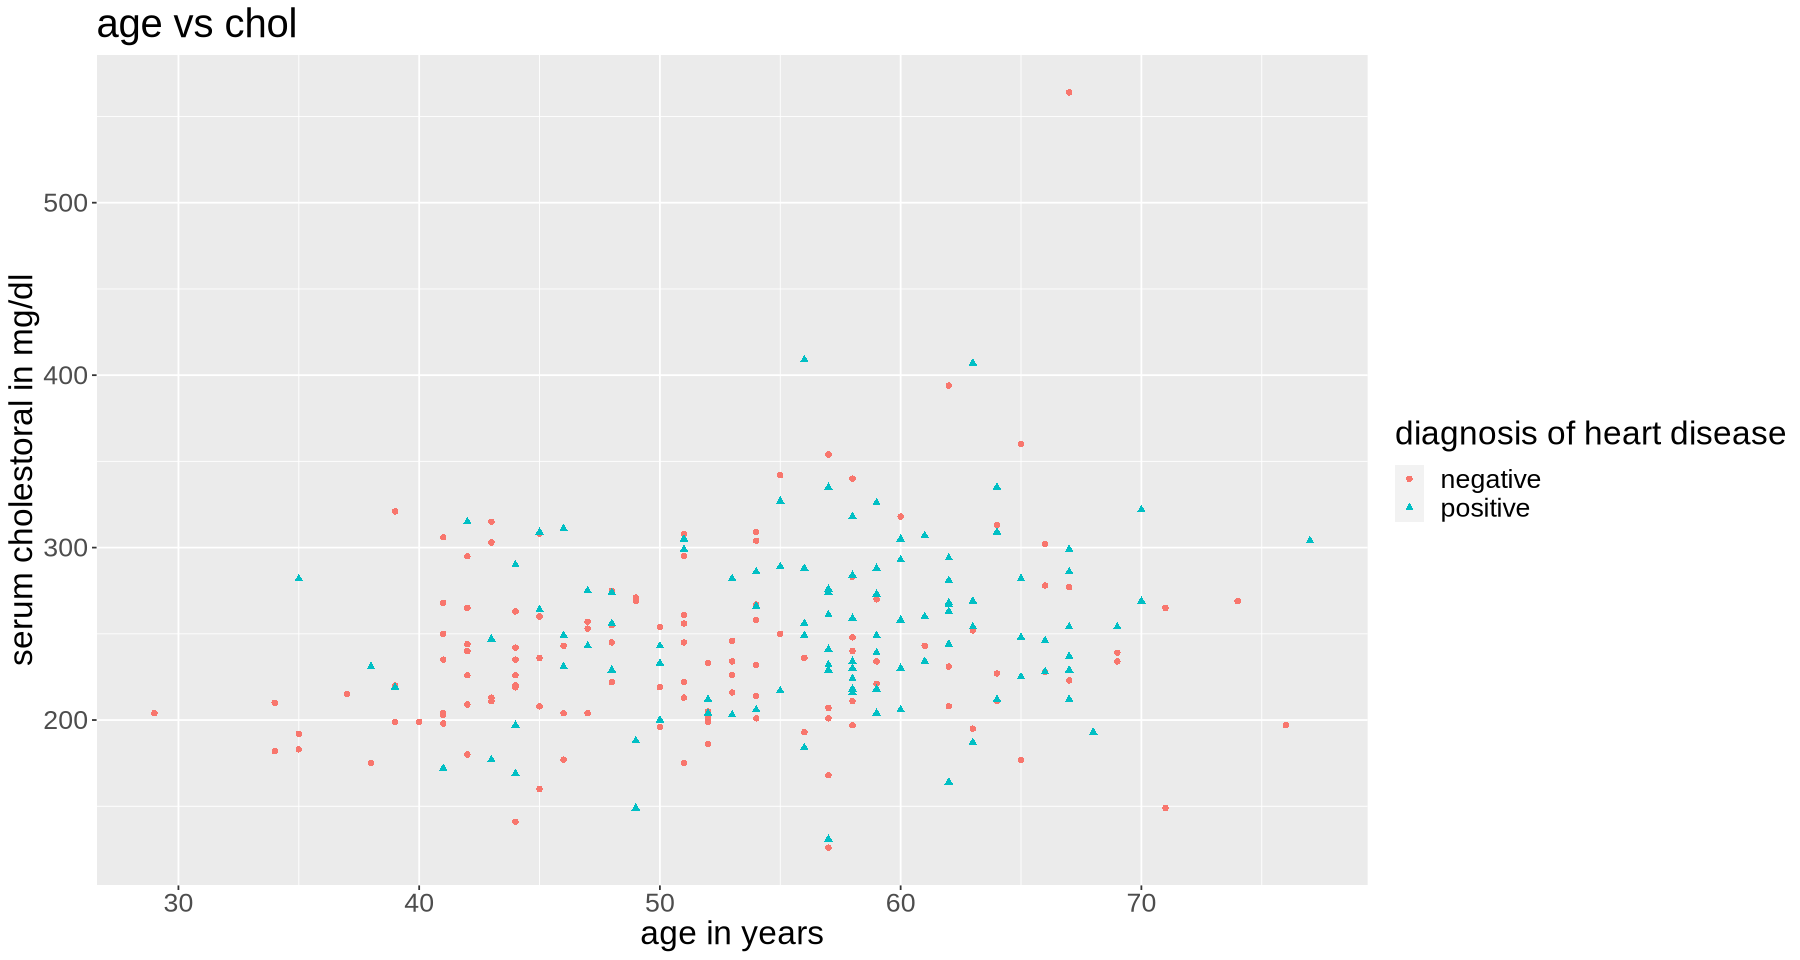

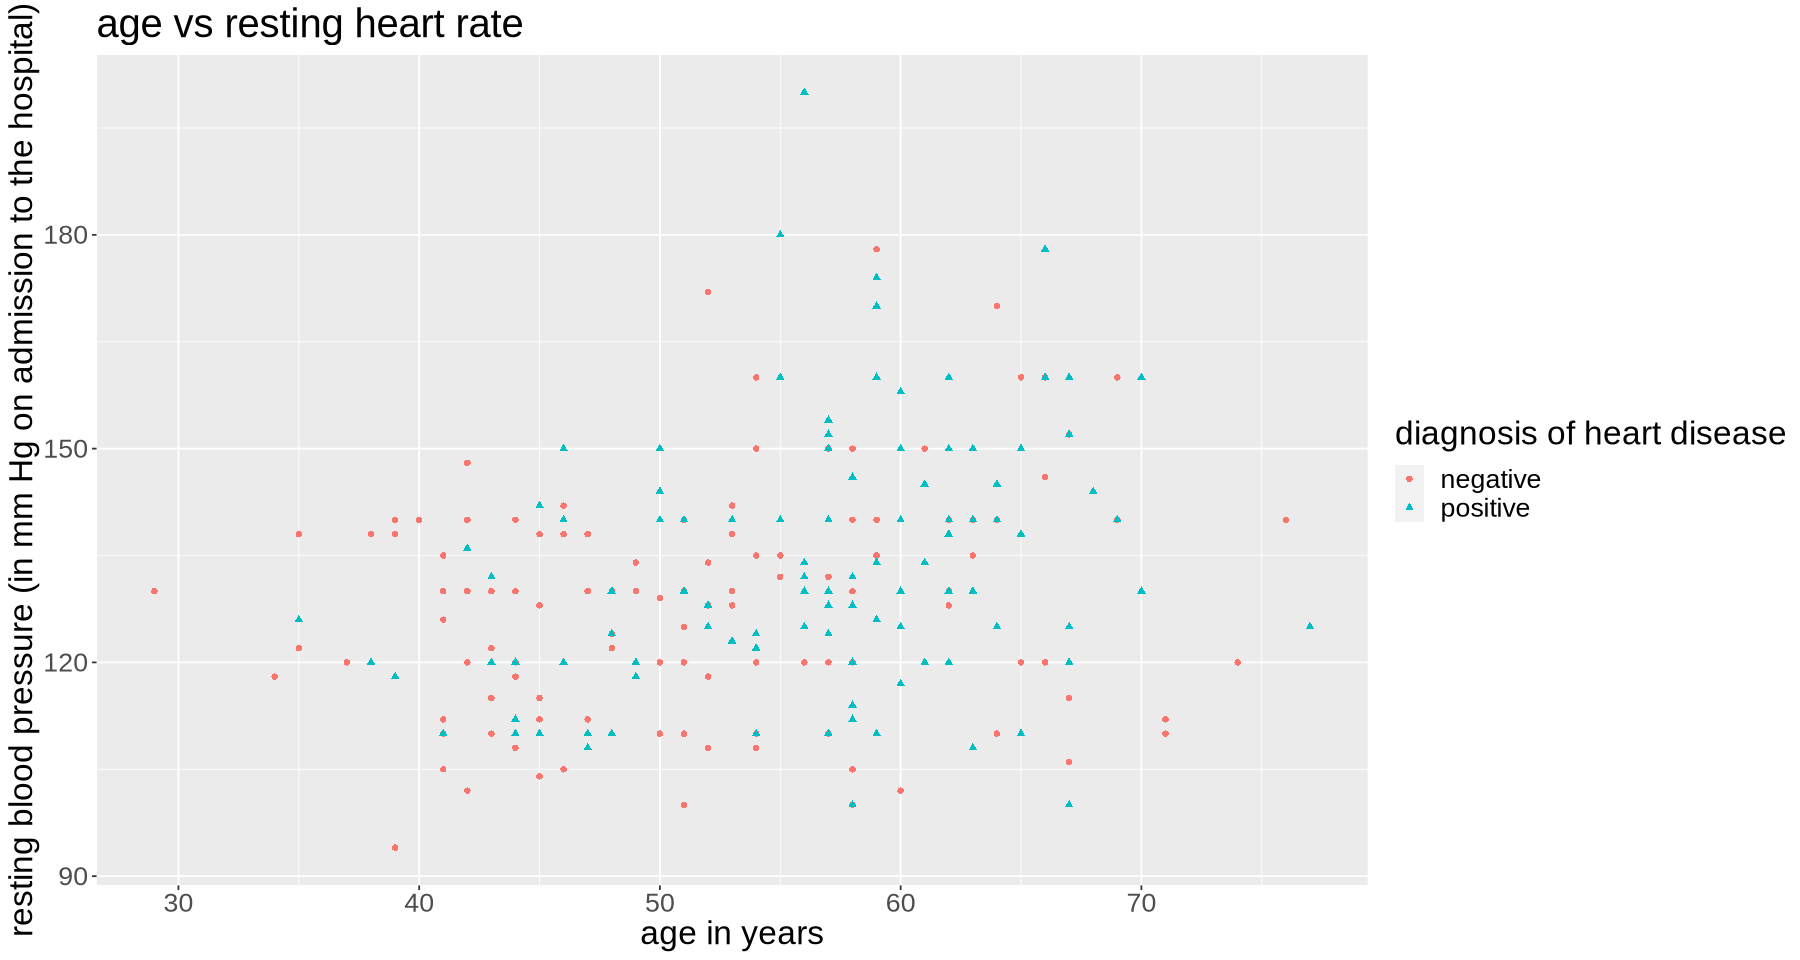

In [5]:
options(repr.plot.width = 15, repr.plot.height = 8)
plot_1 <- ggplot(heart_training, aes(x = trestbps, y = chol, color = num, shape = num)) +
          geom_point() +
          labs(x = "resting blood pressure (in mm Hg on admission to the hospital)", 
               y = "serum cholestoral in mg/dl",
               color = "diagnosis of heart disease", 
               shape = "diagnosis of heart disease") +
          theme(text = element_text(size = 20)) +
          ggtitle("trestbps vs chol")
plot_1

plot_2 <- ggplot(heart_training, aes(x = age, y = chol, color = num, shape = num)) +
          geom_point() +
          labs(x = "age in years", 
               y = "serum cholestoral in mg/dl",
               color = "diagnosis of heart disease",
               shape = "diagnosis of heart disease") +
          theme(text = element_text(size = 20)) +
          ggtitle("age vs cholestrol levels")
plot_2

plot_3 <- ggplot(heart_training, aes(x = age, y = trestbps, color = num, shape = num)) +
          geom_point() +
          labs(x = "age in years", 
               y = "resting blood pressure (in mm Hg on admission to the hospital)",
               color = "diagnosis of heart disease",
               shape = "diagnosis of heart disease") +
          theme(text = element_text(size = 20)) +
          ggtitle("age vs resting heart rate")
plot_3
